In [172]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
from argparse import Namespace
from pathlib import Path
import torch
from pytorch_lightning.trainer import Trainer, seed_everything
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

from turboflow.dataloaders import TurboFlowDataModule
from turboflow.evaluation import compute_all_metrics

from turboflow.utils import phy_utils as phy
from turboflow.utils import torch_utils as tch
from turboflow.utils import file_utils as fle

import matplotlib.pyplot as plt

import pandas
import yaml

from natsort import natsorted

In [163]:
results_dir = Path('..','recipes','turbo2D','single_images','lightning_logs')
results_path = list([str(i) for i in results_dir.glob('*')])
results_path = natsorted(results_path)
df = pandas.DataFrame()

def expfloat2str(x):
    if x == 0:
        return '0'
    if x == 1e-03:
        return '1e-3'
    if x == 1e-05:
        return '1e-5'
    if x == 1e-08:
        return '1e-8'

c = 0
for p in results_path:
    print(p)
    path = Path(p)
    hparams = yaml.load(open(Path(path,'hparams.yaml')),Loader=yaml.FullLoader)
    
    rff_num = hparams['rff_num']
    do_dvf = 'false'
    lam_sdiv = expfloat2str(hparams['lam_sdiv'])
    lam_grads = expfloat2str(hparams['lam_grads'])
    lam_curl = expfloat2str(hparams['lam_curl'])
    lam_sfn = expfloat2str(hparams['lam_sfn'])
    nc = hparams['sfn_num_centers']
    pd = hparams['sfn_patch_dim']
    ni = hparams['sfn_num_increments']

    
    name = f"Turb2D_RFFMLP_rff:{rff_num}-df:{do_dvf}-lsdv:{lam_sdiv}-lgrd:{lam_grads}-lcrl:{lam_curl}-lsfn:{lam_sfn}"
    if lam_sfn != '0':
        name = name + f"-nc:{nc}-pd:{pd}-ni:{ni}"
    
    try:
        res = fle.load_obj(Path(path.parent.parent, 'results', name+'.pkl'))
    except:
        print(name)

    
    df.at[c, 'name'] = name
    df.at[c, 'version'] = str(p).split('/')[-1]
    df.at[c, 'rff_num'] = rff_num
    df.at[c, 'do_dvf'] = do_dvf
    df.at[c, 'lam_sdiv'] = lam_sdiv
    df.at[c, 'lam_grads'] = lam_grads
    df.at[c, 'lam_curl'] = lam_curl
    df.at[c, 'lam_sfn'] = lam_sfn
    df.at[c, 'nc'] = nc
    df.at[c, 'pd'] = pd
    df.at[c, 'ni'] = ni
    df.at[c, 'rec'] = res['test_metrics'][0]['test/metrics/reconstruction']
    df.at[c, 'spc'] = res['test_metrics'][0]['test/metrics/log_err_specturm']
    df.at[c, 'ang'] = res['test_metrics'][0]['test/metrics/angular_degree']
    df.at[c, 'model_path'] = res['path_to_best_model']
    c += 1

../recipes/turbo2D/single_images/lightning_logs/version_0
../recipes/turbo2D/single_images/lightning_logs/version_1
../recipes/turbo2D/single_images/lightning_logs/version_2
../recipes/turbo2D/single_images/lightning_logs/version_3
../recipes/turbo2D/single_images/lightning_logs/version_4
../recipes/turbo2D/single_images/lightning_logs/version_5
../recipes/turbo2D/single_images/lightning_logs/version_6
../recipes/turbo2D/single_images/lightning_logs/version_7
../recipes/turbo2D/single_images/lightning_logs/version_8
../recipes/turbo2D/single_images/lightning_logs/version_9
../recipes/turbo2D/single_images/lightning_logs/version_10
../recipes/turbo2D/single_images/lightning_logs/version_11
../recipes/turbo2D/single_images/lightning_logs/version_12
../recipes/turbo2D/single_images/lightning_logs/version_13
../recipes/turbo2D/single_images/lightning_logs/version_14
Turb2D_RFFMLP_rff:1024-df:false-lsdv:0-lgrd:0-lcrl:1e-8-lsfn:0
../recipes/turbo2D/single_images/lightning_logs/version_15
../

In [164]:
df.to_csv('../results_so_far.csv')
df

,name,version,rff_num,do_dvf,lam_sdiv,lam_grads,lam_curl,lam_sfn,nc,pd,ni,rec,spc,ang,model_path
0,Turb2D_RFFMLP_rff:0-df:false-lsdv:0-lgrd:0-lcr...,version_0,0.0,false,0,0,0,0,50.0,30.0,3.0,0.124453,32.507092,17.114574,/home/dicarlo_d/Documents/Code/TurboSuperResul...
1,Turb2D_RFFMLP_rff:128-df:false-lsdv:0-lgrd:0-l...,version_1,128.0,false,0,0,0,0,50.0,30.0,3.0,0.062481,86.374840,11.309374,/home/dicarlo_d/Documents/Code/TurboSuperResul...
2,Turb2D_RFFMLP_rff:256-df:false-lsdv:0-lgrd:0-l...,version_2,256.0,false,0,0,0,0,50.0,30.0,3.0,0.105516,87.094284,15.186060,/home/dicarlo_d/Documents/Code/TurboSuperResul...
3,Turb2D_RFFMLP_rff:512-df:false-lsdv:0-lgrd:0-l...,version_3,512.0,false,0,0,0,0,50.0,30.0,3.0,0.025476,87.626045,6.840455,/home/dicarlo_d/Documents/Code/TurboSuperResul...
4,Turb2D_RFFMLP_rff:1024-df:false-lsdv:0-lgrd:0-...,version_4,1024.0,false,0,0,0,0,50.0,30.0,3.0,0.017367,88.925514,5.479041,/home/dicarlo_d/Documents/Code/TurboSuperResul...
5,Turb2D_RFFMLP_rff:1024-df:false-lsdv:0-lgrd:0-...,version_5,1024.0,false,0,0,0,0,16.0,16.0,3.0,0.017367,88.925514,5.479041,/home/dicarlo_d/Documents/Code/TurboSuperResul...
6,Turb2D_RFFMLP_rff:1024-df:false-lsdv:1e-5-lgrd...,version_6,1024.0,false,1e-5,0,0,0,16.0,16.0,3.0,0.006513,85.123016,3.396706,/home/dicarlo_d/Documents/Code/TurboSuperResul...
7,Turb2D_RFFMLP_rff:1024-df:false-lsdv:1e-3-lgrd...,version_7,1024.0,false,1e-3,0,0,0,16.0,16.0,3.0,0.002418,69.399979,1.783402,/home/dicarlo_d/Documents/Code/TurboSuperResul...
8,Turb2D_RFFMLP_rff:1024-df:false-lsdv:0-lgrd:1e...,version_8,1024.0,false,0,1e-5,0,0,16.0,16.0,3.0,0.020595,85.615860,6.215709,/home/dicarlo_d/Documents/Code/TurboSuperResul...
9,Turb2D_RFFMLP_rff:1024-df:false-lsdv:1e-5-lgrd...,version_9,1024.0,false,1e-5,1e-5,0,0,16.0,16.0,3.0,0.003844,69.206490,2.456222,/home/dicarlo_d/Documents/Code/TurboSuperResul...


In [94]:
# load dataset
data_dir = Path('/','home','dicarlo_d','Documents','Datasets','Turb2D.hdf5')
dm = TurboFlowDataModule(dataset='Turb2D', 
                         data_dir=data_dir,
                         batch_size=100000,
                         time_idx=0,
                         train_downsampling=8,
                         val_downsampling=4,
                         test_downsampling=1,
                         num_workers=1)
dm.setup()


X_lr, y_lr = dm.train_dataset[:]
img_shape_lr = dm.train_dataset.img_shape[:2]
shape_lr = dm.train_dataset.img_shape
L = shape_lr[0]
N_lr = X_lr.shape[0]
print(N_lr, L)

X_mr, y_mr = dm.val_dataset[:]
img_shape_mr = dm.val_dataset.img_shape[:2]
shape_mr = dm.val_dataset.img_shape
M = shape_mr[0]
N_mr = X_mr.shape[0]
print(N_mr, M)

X_hr, y_hr = dm.test_dataset[:]
img_shape_hr = dm.test_dataset.img_shape[:2]
shape_hr = dm.test_dataset.img_shape
H = shape_hr[0]
N_hr = X_hr.shape[0]
print(N_hr, H)

1024 32
4096 64
65536 256


Influence of the number of RFF

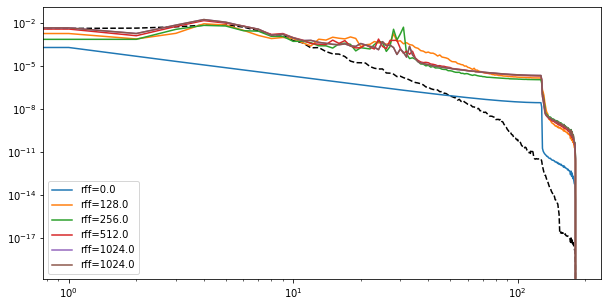

In [167]:
spec_gt = phy.energy_spectrum(y_hr.view(H,H,2).permute(2,0,1))[0]
plt.figure(figsize=(10,5))
plt.loglog(spec_gt.detach(), 'k--')

for r, row in df.iterrows():    
    
    if r > 5:
        continue
    
    model_path = row['model_path']
    num_rff = row['rff_num']
    
    from turboflow.models.phyrff_hard import plDivFreeRFFNet
    model = plDivFreeRFFNet.load_from_checkpoint(model_path)
    
    y_hat = model(X_hr)[0]
    
    spec = phy.energy_spectrum(y_hat.view(H,H,2).permute(2,0,1))[0]
    plt.loglog(spec.detach().cpu().numpy(), label=f'rff={num_rff}')

    
plt.legend()
plt.show()

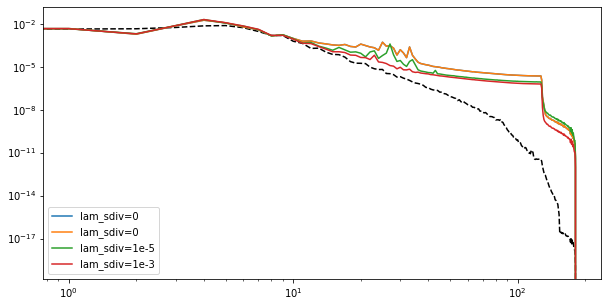

In [168]:
spec_gt = phy.energy_spectrum(y_hr.view(H,H,2).permute(2,0,1))[0]
plt.figure(figsize=(10,5))
plt.loglog(spec_gt.detach(), 'k--')

for r, row in df.iterrows():
    
    if r not in [4, 5, 6, 7]:
        continue
    
    model_path =row['model_path']
    lam_sdiv =row['lam_sdiv']
    
    from turboflow.models.phyrff_hard import plDivFreeRFFNet
    model = plDivFreeRFFNet.load_from_checkpoint(model_path)
    
    y_hat = model(X_hr)[0]
    
    spec = phy.energy_spectrum(y_hat.view(H,H,2).permute(2,0,1))[0]
    plt.loglog(spec.detach().cpu().numpy(), label=f'lam_sdiv={lam_sdiv}')

    
plt.legend()
plt.show()

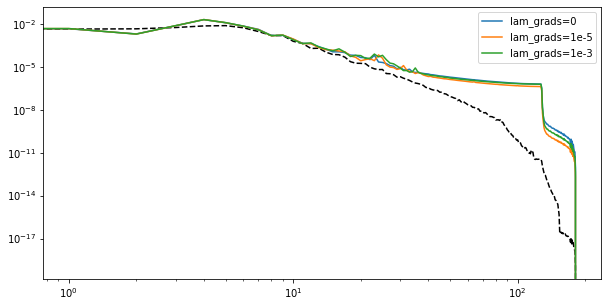

In [170]:
spec_gt = phy.energy_spectrum(y_hr.view(H,H,2).permute(2,0,1))[0]
plt.figure(figsize=(10,5))
plt.loglog(spec_gt.detach(), 'k--')

for r, row in df.iterrows():
    
    if r not in [7, 10, 13]:
        continue
    
    model_path = row['model_path']
    lam_grads = row['lam_grads']
    
    from turboflow.models.phyrff_hard import plDivFreeRFFNet
    model = plDivFreeRFFNet.load_from_checkpoint(model_path)
    
    y_hat = model(X_hr)[0]
    
    spec = phy.energy_spectrum(y_hat.view(H,H,2).permute(2,0,1))[0]
    plt.loglog(spec.detach().cpu().numpy(), label=f'lam_grads={lam_grads}')

    
plt.legend()
plt.show()

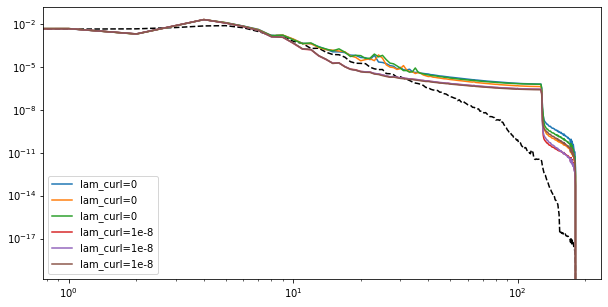

In [171]:
spec_gt = phy.energy_spectrum(y_hr.view(H,H,2).permute(2,0,1))[0]
plt.figure(figsize=(10,5))
plt.loglog(spec_gt.detach(), 'k--')

for r, row in df.iterrows():
    
    if r not in [7, 10, 13, 16, 19, 22]:
        continue
    
    model_path = row['model_path']
    lam_curl = row['lam_curl']
    
    from turboflow.models.phyrff_hard import plDivFreeRFFNet
    model = plDivFreeRFFNet.load_from_checkpoint(model_path)
    
    y_hat = model(X_hr)[0]
    
    spec = phy.energy_spectrum(y_hat.view(H,H,2).permute(2,0,1))[0]
    plt.loglog(spec.detach().cpu().numpy(), label=f'lam_curl={lam_curl}')

    
plt.legend()
plt.show()

KeyboardInterrupt: 

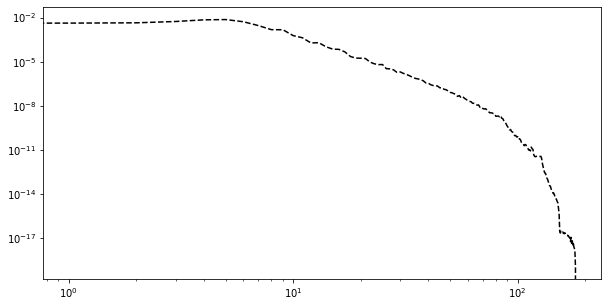

In [161]:
spec_gt = phy.energy_spectrum(y_hr.view(H,H,2).permute(2,0,1))[0]
plt.figure(figsize=(10,5))
plt.loglog(spec_gt.detach(), 'k--')

for r, row in df.iterrows():
    
    if r not in [22, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 44, 45, 46, 47:
        continue
    
    model_path = row['model_path']
    
    from turboflow.models.phyrff_hard import plDivFreeRFFNet
    model = plDivFreeRFFNet.load_from_checkpoint(model_path)
    
    y_hat = model(X_hr)[0]
    
    spec = phy.energy_spectrum(y_hat.view(H,H,2).permute(2,0,1))[0]
    plt.loglog(spec.detach().cpu().numpy(), label=r)

    
plt.legend()
plt.show()

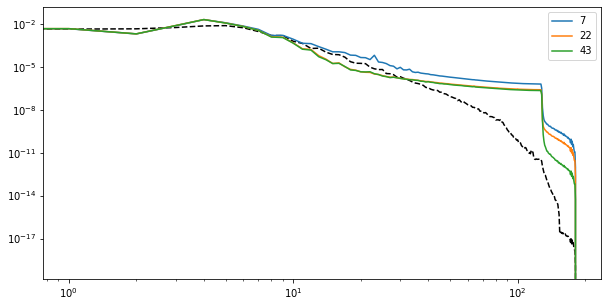

In [162]:
spec_gt = phy.energy_spectrum(y_hr.view(H,H,2).permute(2,0,1))[0]
plt.figure(figsize=(10,5))
plt.loglog(spec_gt.detach(), 'k--')

for r, row in df.iterrows():
    
    if r not in [7, 22, 43]:
        continue
    
    model_path = row['model_path']
    
    from turboflow.models.phyrff_hard import plDivFreeRFFNet
    model = plDivFreeRFFNet.load_from_checkpoint(model_path)
    
    y_hat = model(X_hr)[0]
    
    spec = phy.energy_spectrum(y_hat.view(H,H,2).permute(2,0,1))[0]
    plt.loglog(spec.detach().cpu().numpy(), label=r)

    
plt.legend()
plt.show()

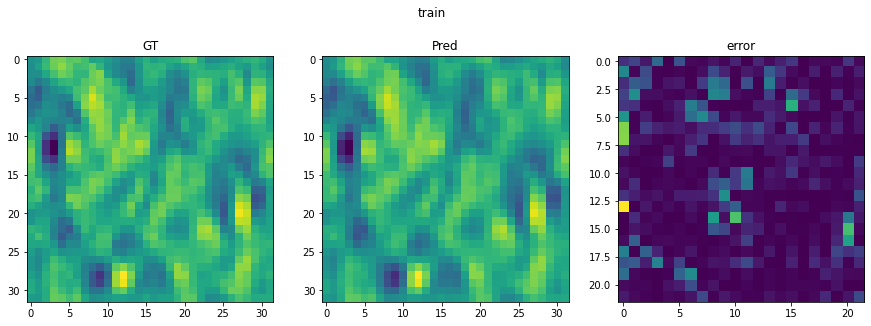

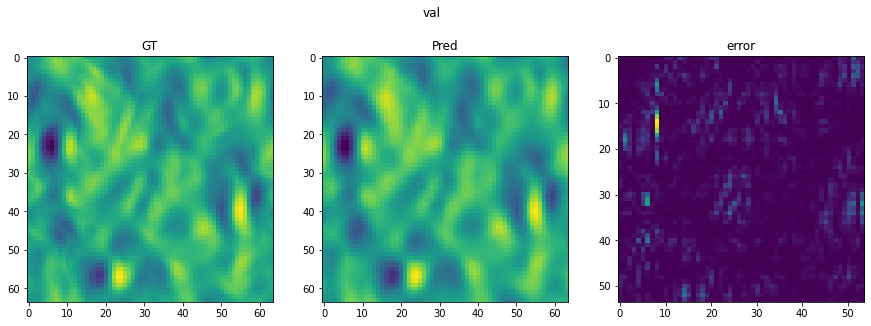

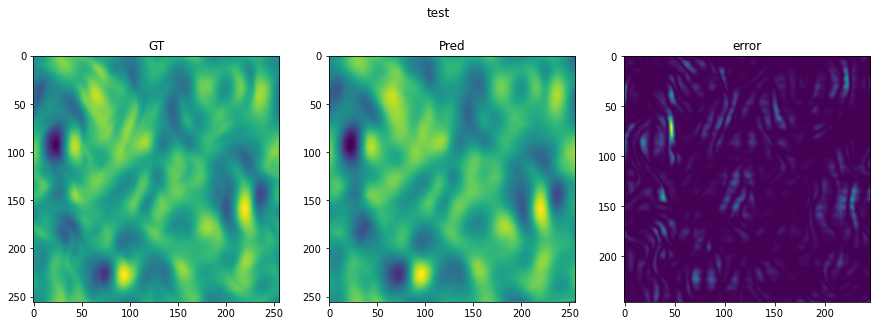

In [9]:
for stage in dsets_dict.keys():
    
    data = dsets_dict[stage]
    X = data['X']
    y = data['y']
    R = data['R']
    
    y_hat, P_hat = model(X)

    err = torch.abs(y_hat - y)**2

    plt.figure(figsize=(15,5))
    plt.suptitle(f'{stage}')
    plt.subplot(131)
    plt.title('GT')
    plt.imshow(y[:,0].view(R,R).detach())
    plt.subplot(132)
    plt.title('Pred')
    plt.imshow(y_hat[:,0].view(R,R).detach())
    plt.subplot(133)
    plt.title('error')
    plt.imshow(err[:,0].view(R,R)[5:-5,5:-5].detach())
    plt.show()

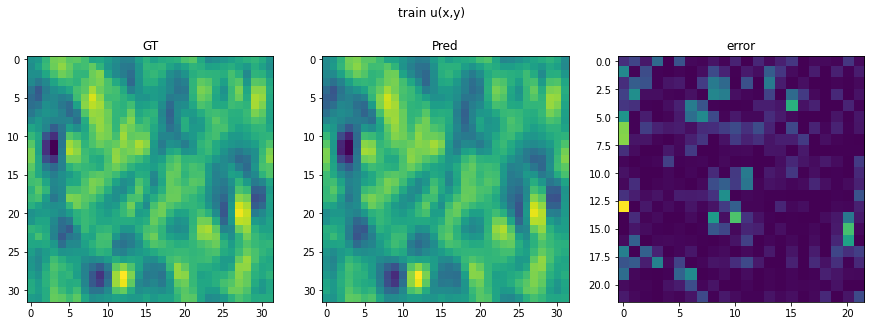

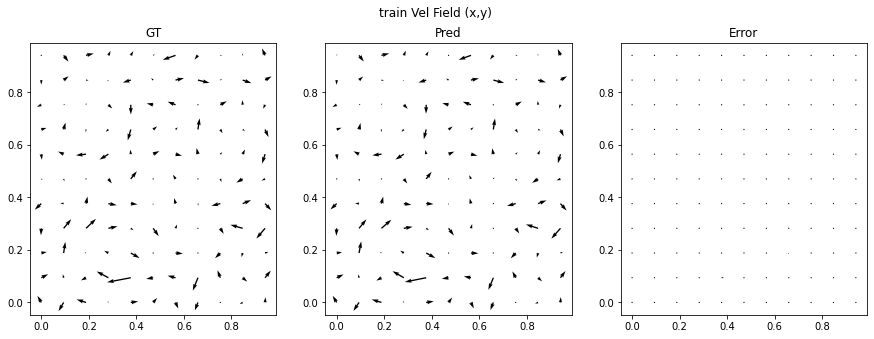

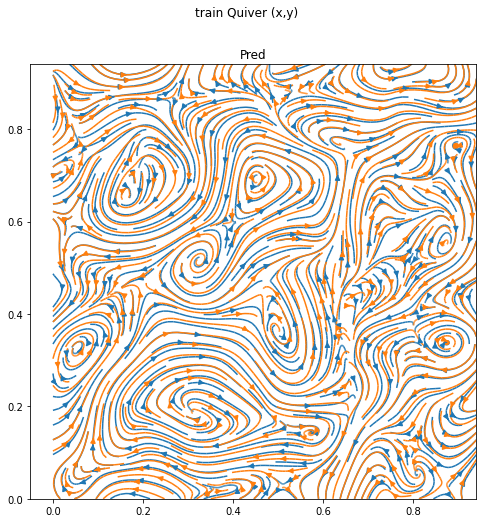

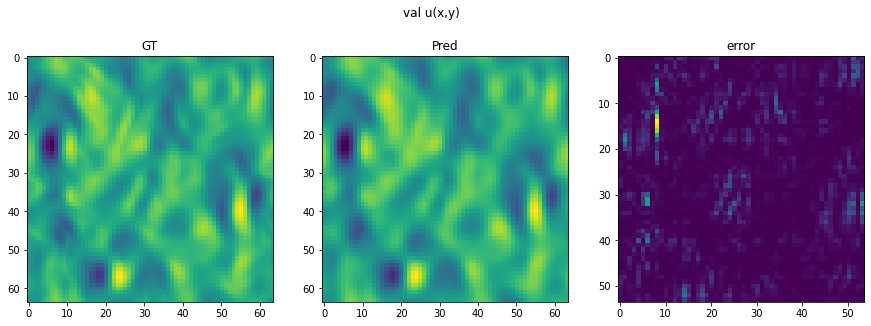

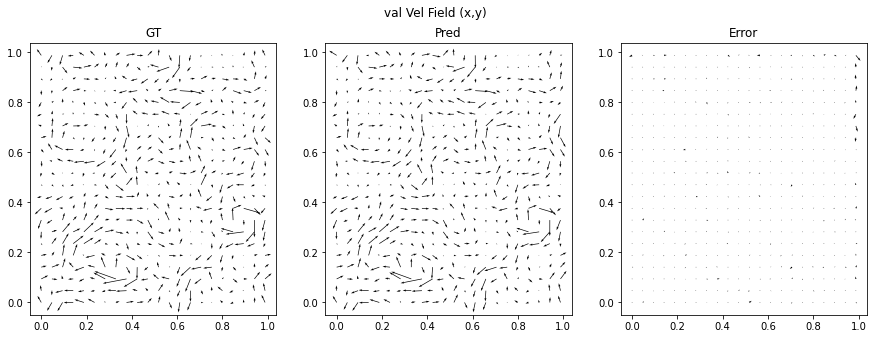

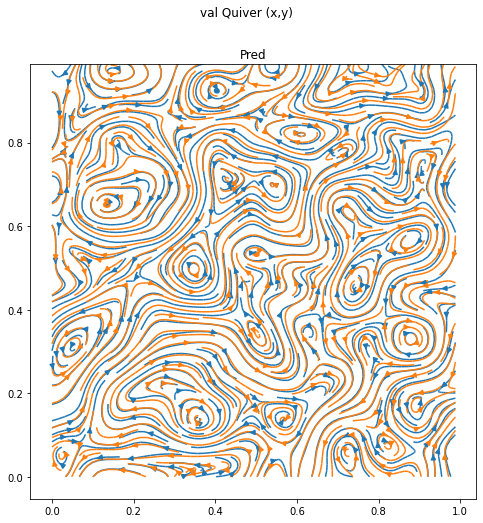

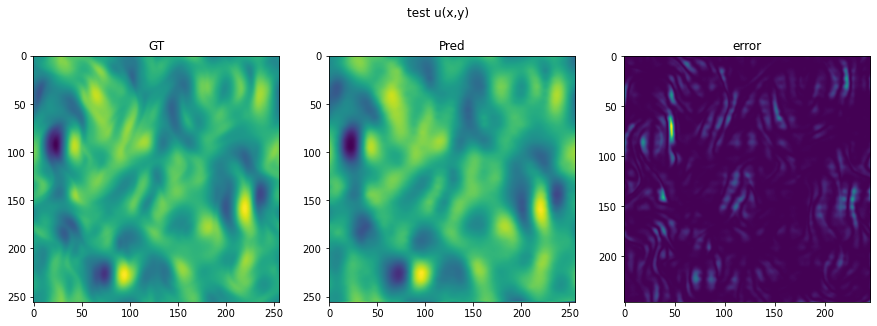

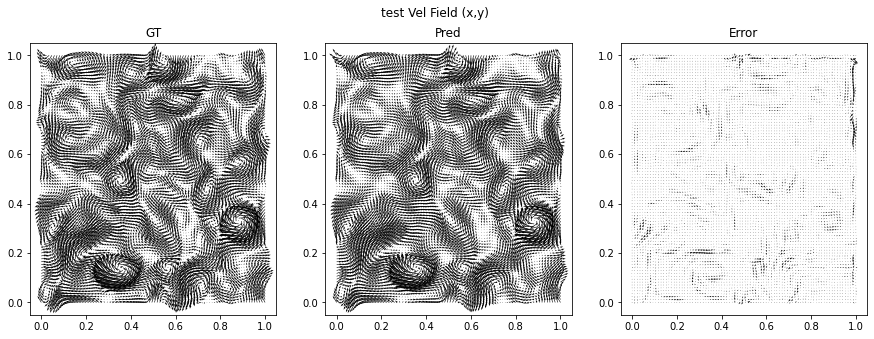

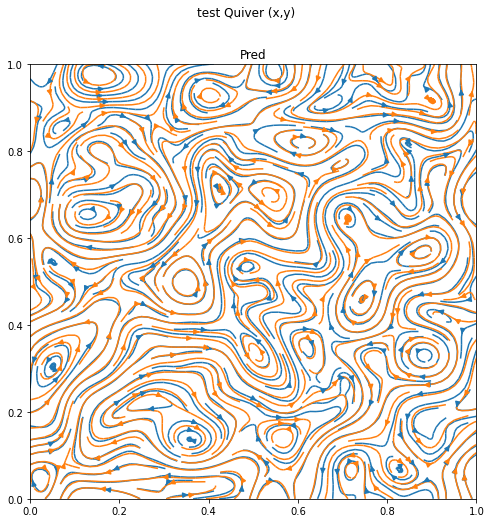

In [28]:
for stage in dsets_dict.keys():
    
    data = dsets_dict[stage]
    X = data['X']
    y = data['y']
    R = data['R']
    
    y_hat, P_hat = model(X)

    diff = y_hat - y
    err = torch.abs(diff)**2

    plt.figure(figsize=(15,5))
    plt.suptitle(f'{stage} u(x,y)')
    plt.subplot(131)
    plt.title('GT')
    plt.imshow(y[:,0].view(R,R).detach())
    plt.subplot(132)
    plt.title('Pred')
    plt.imshow(y_hat[:,0].view(R,R).detach())
    plt.subplot(133)
    plt.title('error')
    plt.imshow(err[:,0].view(R,R)[5:-5,5:-5].detach())
    plt.show()
    
    
    s = 3
    plt.figure(figsize=(15,5))
    plt.suptitle(f'{stage} Vel Field (x,y)')
    plt.subplot(131)
    plt.title('GT')
    plt.quiver(X[:,0].view(R,R)[::s,::s].detach(), 
               X[:,1].view(R,R)[::s,::s].detach(),
               y[:,0].view(R,R)[::s,::s].detach(),
               y[:,1].view(R,R)[::s,::s].detach(), scale=10)
    plt.subplot(132)
    plt.title('Pred')
    plt.quiver(X[:,0].view(R,R)[::s,::s].detach(), 
               X[:,1].view(R,R)[::s,::s].detach(),
               y_hat[:,0].view(R,R)[::s,::s].detach(),
               y_hat[:,1].view(R,R)[::s,::s].detach(), scale=10)
    plt.subplot(133)
    plt.title('Error')
    plt.quiver(X[:,0].view(R,R)[::s,::s].detach(), 
               X[:,1].view(R,R)[::s,::s].detach(),
               diff[:,0].view(R,R)[::s,::s].detach(),
               diff[:,1].view(R,R)[::s,::s].detach(), scale=10)
    plt.show()
    
    plt.figure(figsize=(8,8))
    plt.suptitle(f'{stage} Quiver (x,y)')
    plt.title('GT')
    plt.streamplot(        
               X[:,0].view(R,R)[::s,::s].T.detach().numpy(), 
               X[:,1].view(R,R)[::s,::s].T.detach().numpy(),
               y[:,0].view(R,R)[::s,::s].T.detach().numpy(),
               y[:,1].view(R,R)[::s,::s].T.detach().numpy(), density=2)
    plt.title('Pred')
    plt.streamplot(
                   X[:,0].view(R,R)[::s,::s].T.detach().numpy(), 
                   X[:,1].view(R,R)[::s,::s].T.detach().numpy(),
               y_hat[:,0].view(R,R)[::s,::s].T.detach().numpy(),
               y_hat[:,1].view(R,R)[::s,::s].T.detach().numpy(), density=2)
    plt.show()

Stage train 32
Stage val 64
Stage test 256
Stage train 32
Stage val 64
Stage test 256


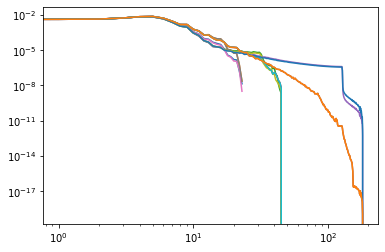

In [36]:
model_paths = [
    '/home/dicarlo_d/Documents/Code/TurboSuperResultion/notebooks/.torch_checkpoints/Turb2D-RFFNet-epoch=599-val_loss=0.00-v1.ckpt',
    '/home/dicarlo_d/Documents/Code/TurboSuperResultion/notebooks/.torch_checkpoints/Turb2D-RFFNet-epoch=279-val_loss=0.00-v8.ckpt',
]

for path in model_paths:
    
    model = plDivFreeRFFNet.load_from_checkpoint(path)
    
    for stage in dsets_dict.keys():

        data = dsets_dict[stage]
        X = data['X']
        y = data['y']
        R = data['R']

        y_hat, P_hat = model(X)

        diff = y_hat - y
        err = torch.abs(diff)**2

        print('Stage', stage, R)
#         print(compute_all_metrics(y_hat, y))
        
        spec = phy.energy_spectrum(y_hat.view(R,R,2).permute(2,0,1))[0]
        spec_gt = phy.energy_spectrum(y.view(R,R,2).permute(2,0,1))[0]
        plt.loglog(spec.detach())
        plt.loglog(spec_gt.detach())
        
        
        